In [3]:
print(logits.shape)

(1075, 4)


<class 'dict'>


{'args': Namespace(no_progress_bar=False, log_interval=10, log_format='simple', tensorboard_logdir='', wandb_project='', wandb_name='', seed=1, cpu=False, fp16=False, bf16=False, bf16_sr=False, allreduce_fp32_grad=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir='./unimat', empty_cache_freq=0, all_gather_list_size=16384, suppress_crashes=False, profile=False, ema_decay=-1.0, validate_with_ema=False, loss='cross_entropy_ws24', optimizer='adam', lr_scheduler='polynomial_decay', task='unimof_ws24', num_workers=0, skip_invalid_size_inputs_valid_test=False, batch_size=1, required_batch_size_multiple=1, data_buffer_size=10, train_subset='train', valid_subset='valid,test', validate_interval=1, validate_interval_updates=0, validate_after_updates=0, fixed_validation_seed=None, disable_validation=False, batch_size_valid=1, max_valid_steps=None, curriculum=0, distributed_world_size

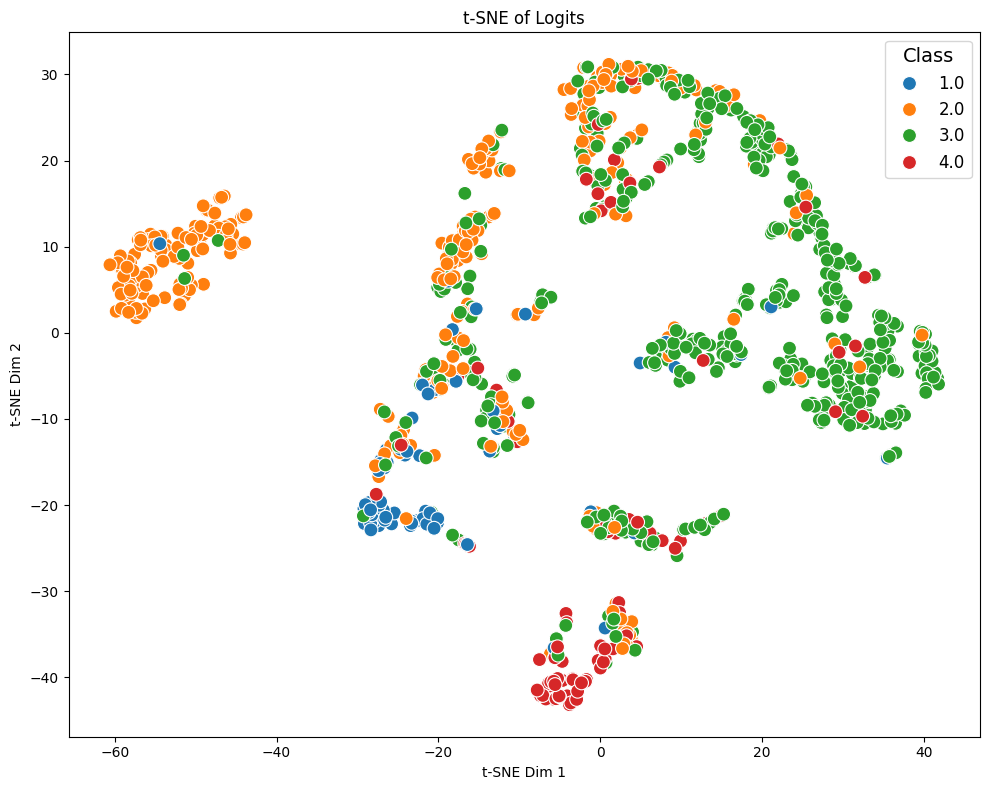

In [ ]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load saved embeddings
with open("evaluation/logs_train.out.pkl", "evaluation/logs_test.out.pkl", "evaluation/logs_valid.out.pkl", "rb") as f:
    data = pickle.load(f)

X = np.vstack(data["cls_repr"])
y = np.hstack(data["labels"])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", s=60)
plt.title("t-SNE of CLS Representations")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()

In [ ]:
pip install umap-learn

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 17.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/gihyun/Downloads/logs_and_evaluation_data/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gihyun/Downloads/logs_and_evaluation_data/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


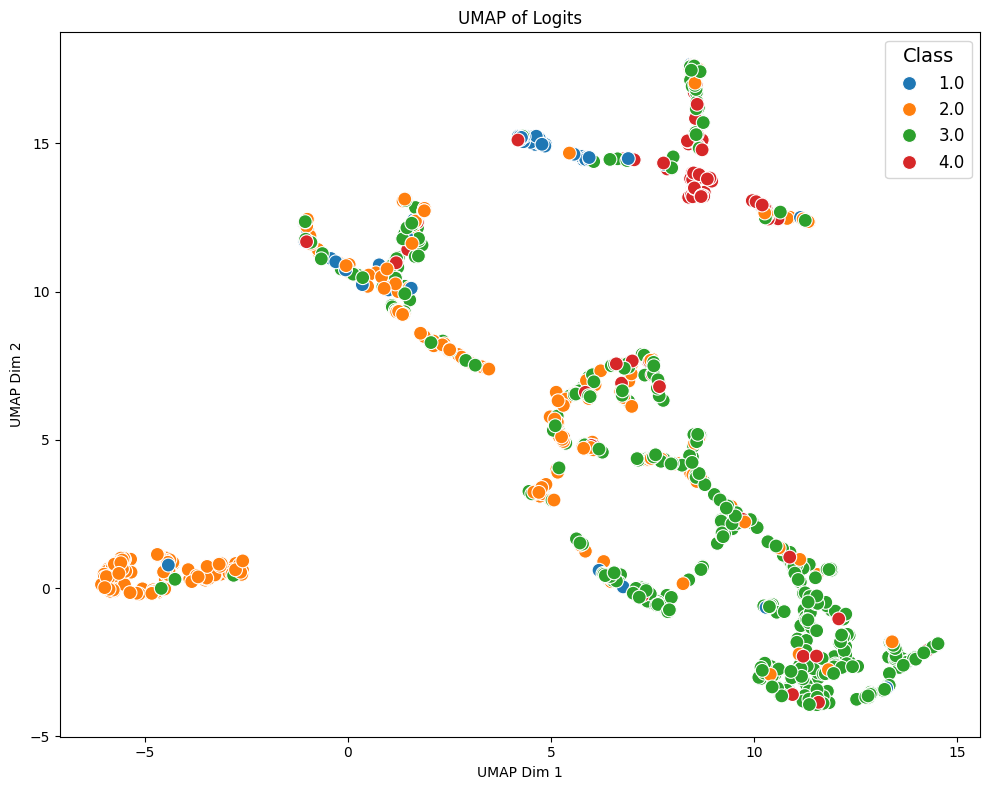

In [10]:

import umap

# --- Load the .pkl files for all logs ---
log_files = ["evaluation/logs_train.out.pkl", "evaluation/logs_test.out.pkl", "evaluation/logs_valid.out.pkl"]
all_logs = []

# Load each file and append its content
for log_file in log_files:
    with open(log_file, "rb") as f:
        logs = pickle.load(f)
        all_logs.extend(logs)

# --- Extract logits and targets ---
all_logits = [entry["logits"].detach().cpu() for entry in all_logs]
all_targets = [entry["target"].detach().cpu() for entry in all_logs]

logits = torch.cat(all_logits).numpy()
targets = torch.cat(all_targets).numpy()

# --- Apply UMAP ---
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(logits)

# --- Plot ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=targets, palette="tab10", s=100)
plt.title("UMAP of Logits")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.legend(title="Class", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()
